In [11]:
import numpy as np
from ipywidgets import interact
import cv2
import matplotlib.pyplot as plt
import pytesseract

In [2]:
INCHES = 32


def show_image(image):

    fig, ax = plt.subplots(1, 1)

    ax.imshow(image, cmap='gray')
    ax.axis('off')

    fig.set_size_inches(INCHES, INCHES)
    plt.show()

(3321, 4467)


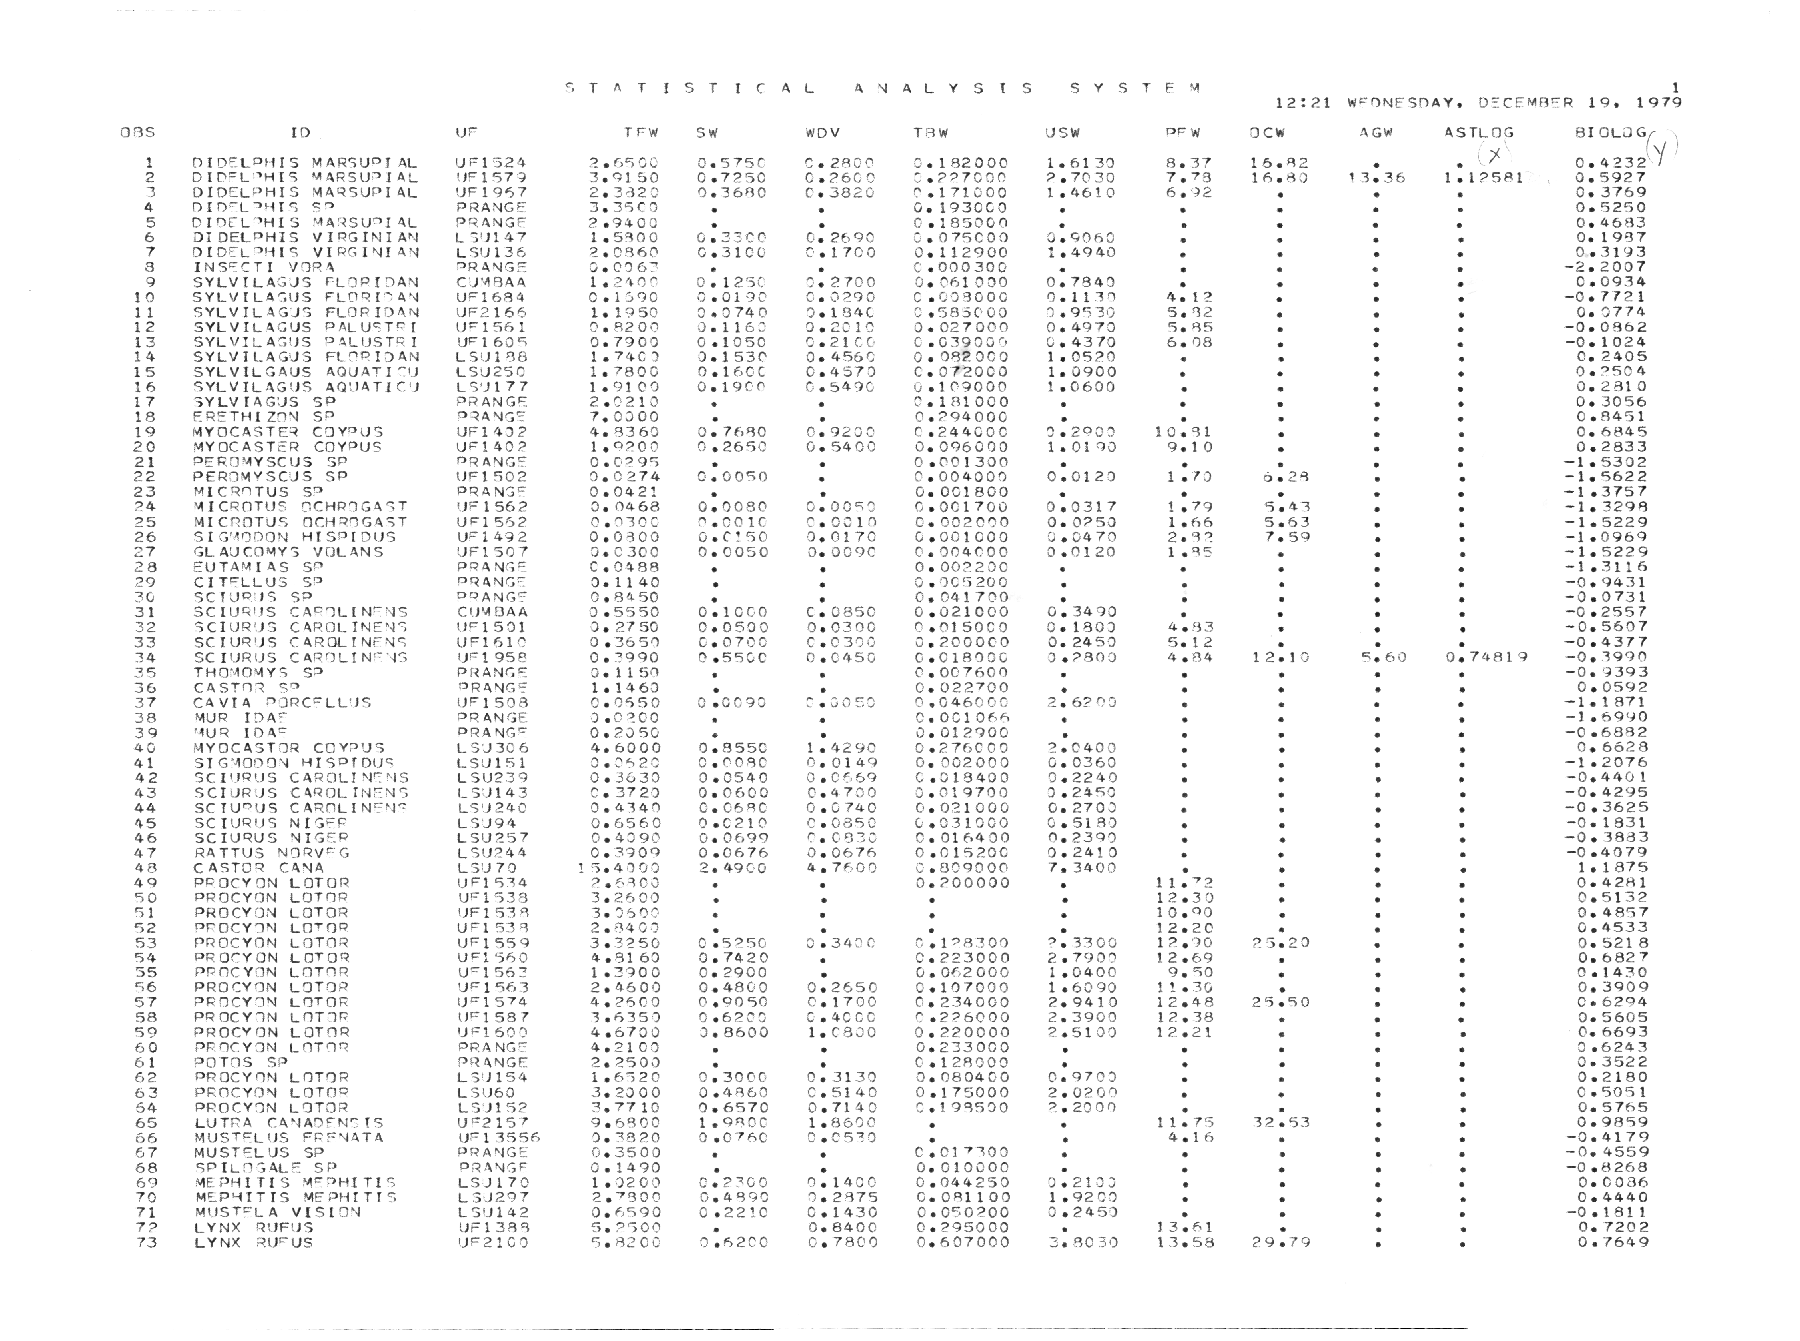

In [3]:
gray = cv2.imread('Sheetfeed/test0019.tif', cv2.IMREAD_GRAYSCALE)
gray = cv2.rotate(gray, cv2.ROTATE_90_CLOCKWISE)

print(gray.shape)
show_image(gray)

In [32]:
ocr = pytesseract.image_to_string(gray, lang='eng', config='allometry.config')
print(ocr)

STA TFS TTCAL ANAL YS TS SY S TEM 1
12221 WFONESNDAY. DECEMBER 195 1979

OBS ID UF TFW SW WOV TRW USW DFW 9CW AGW ASTLOG BIOLG

N

1 DIDELPHIS MARSUST AL YF1I524 206590 005750 C 2800 02182000 1.26139 B37 16282 . 024232
2 DIDFLOHTS MARSUPTAL UFIS79 329150 007250 622609 S2227C00 227030 7073 16389 13036 1212581 005927
3 DIDELPHIS MARSUPT AL UF1967 2032320 923680 C 3826 2171000 1246190 6092 . O02 3769
4 DIDTLPHTS P PRANGE 323509 . . G2 193009 . . . . 025250
5 DIDELPHIS MARSUPTAL PRANGE 209400 . C20185069 . . 024633
6 DIDELPHIS VIRGINIAN LSIL47 1.25300 G25 C 2690 5290750909 0290698 . . . . 001987
7 DIDELPHIS VIRGINIAN LSU136 220860 623100 C21709 02112900 124940 . . 003193
8 INSECTI VORA PRANGE GCI 62 6 2000306 . . . -222007
9 SYLVTILAGUS FLOPRIDAN CUMBAA 122400 021256 222700 O02 0619090 02.7849 . . . . 020934
10 SYLVILASGUS FLORITAN UF1634 021590 920190 620290 C 2593000 901139 4012 . . O2027721
11 SYLVILAGJS FLORIDAN UF2166 161950 009745 90184C 02585069 909530 S 32 . . O00 9774
12 SYLVILAGU

In [33]:
kernel = np.ones((4, 4), np.uint8)

binary = None


def binarize(threshold):
    global binary

    # binary = cv2.threshold(gray, 0, threshold, cv2.THRESH_BINARY)[1]
#     binary = cv2.threshold(
#         gray, 0, threshold,
#         cv2.THRESH_OTSU)[1]

    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 2)

    show_image(binary)


interact(binarize, threshold=(0, 255))

interactive(children=(IntSlider(value=127, description='threshold', max=255), Output()), _dom_classes=('widget…

<function __main__.binarize(threshold)>

In [34]:
ocr = pytesseract.image_to_string(binary, lang='eng', config='allometry.config')
print(ocr)

STATIS TTCAL ANALYST 5 SYS TEM

1
12221 WFONESDAY. DECEMBER 194. 1979

98S ID UF TFW SW WOV TBW USW PFW OCW AGW ASTLOG

N

1 DIDELPHIS MARSUPT AL UF1524 206500 0.5750 C2 02182000 126130 B 37 16082 LA 024232
2 DIDFLPHIS MARSUPIAL UF 1579 329150 07250 022609 62227600 27030 7278 16680 13036 16125817... 045927
3 DIDELPHIS MARSUPTI AL UF 1967 203320 92.3680 0.23826 O2171000 124610 6292 . O 3769
4 DIDELPHTS SP PRANGE 3.3560 O2193060 . . . 025250
5 DIDELPHIS MARSUPT AL PRANGE 229400 . 02185000 . . . . O 4683
6 DIDELPHIS VIRGINIAN L35U147 1.25300 6223500 G 2690 62075000 029060 . . 0.1987
7 DIDELPHIS VIRGINIAN LSU136 220869 043100 C21700 02112900 124940 . Q.2 3193
3 INSECTI VORA PRANGE 040962 6 000300 2 . -222007
9 SYLVILAGUS FLORIDAN CUMBAA 162400 0.21250 022700 02 0619000 0.78490 020934
10 SYLVILAGUS FLORIDAN UF 1684 021590 920190 020290 C.20983060 921130 42 7 O007721
1 SYLVILAGUS FLORIDAN UF2166 101950 0.0740 9 B40 00585009 929530 54.32 . . 0 S774
12 SYLVILAGUS PALUSTSI UF1S561 0.8200 021160

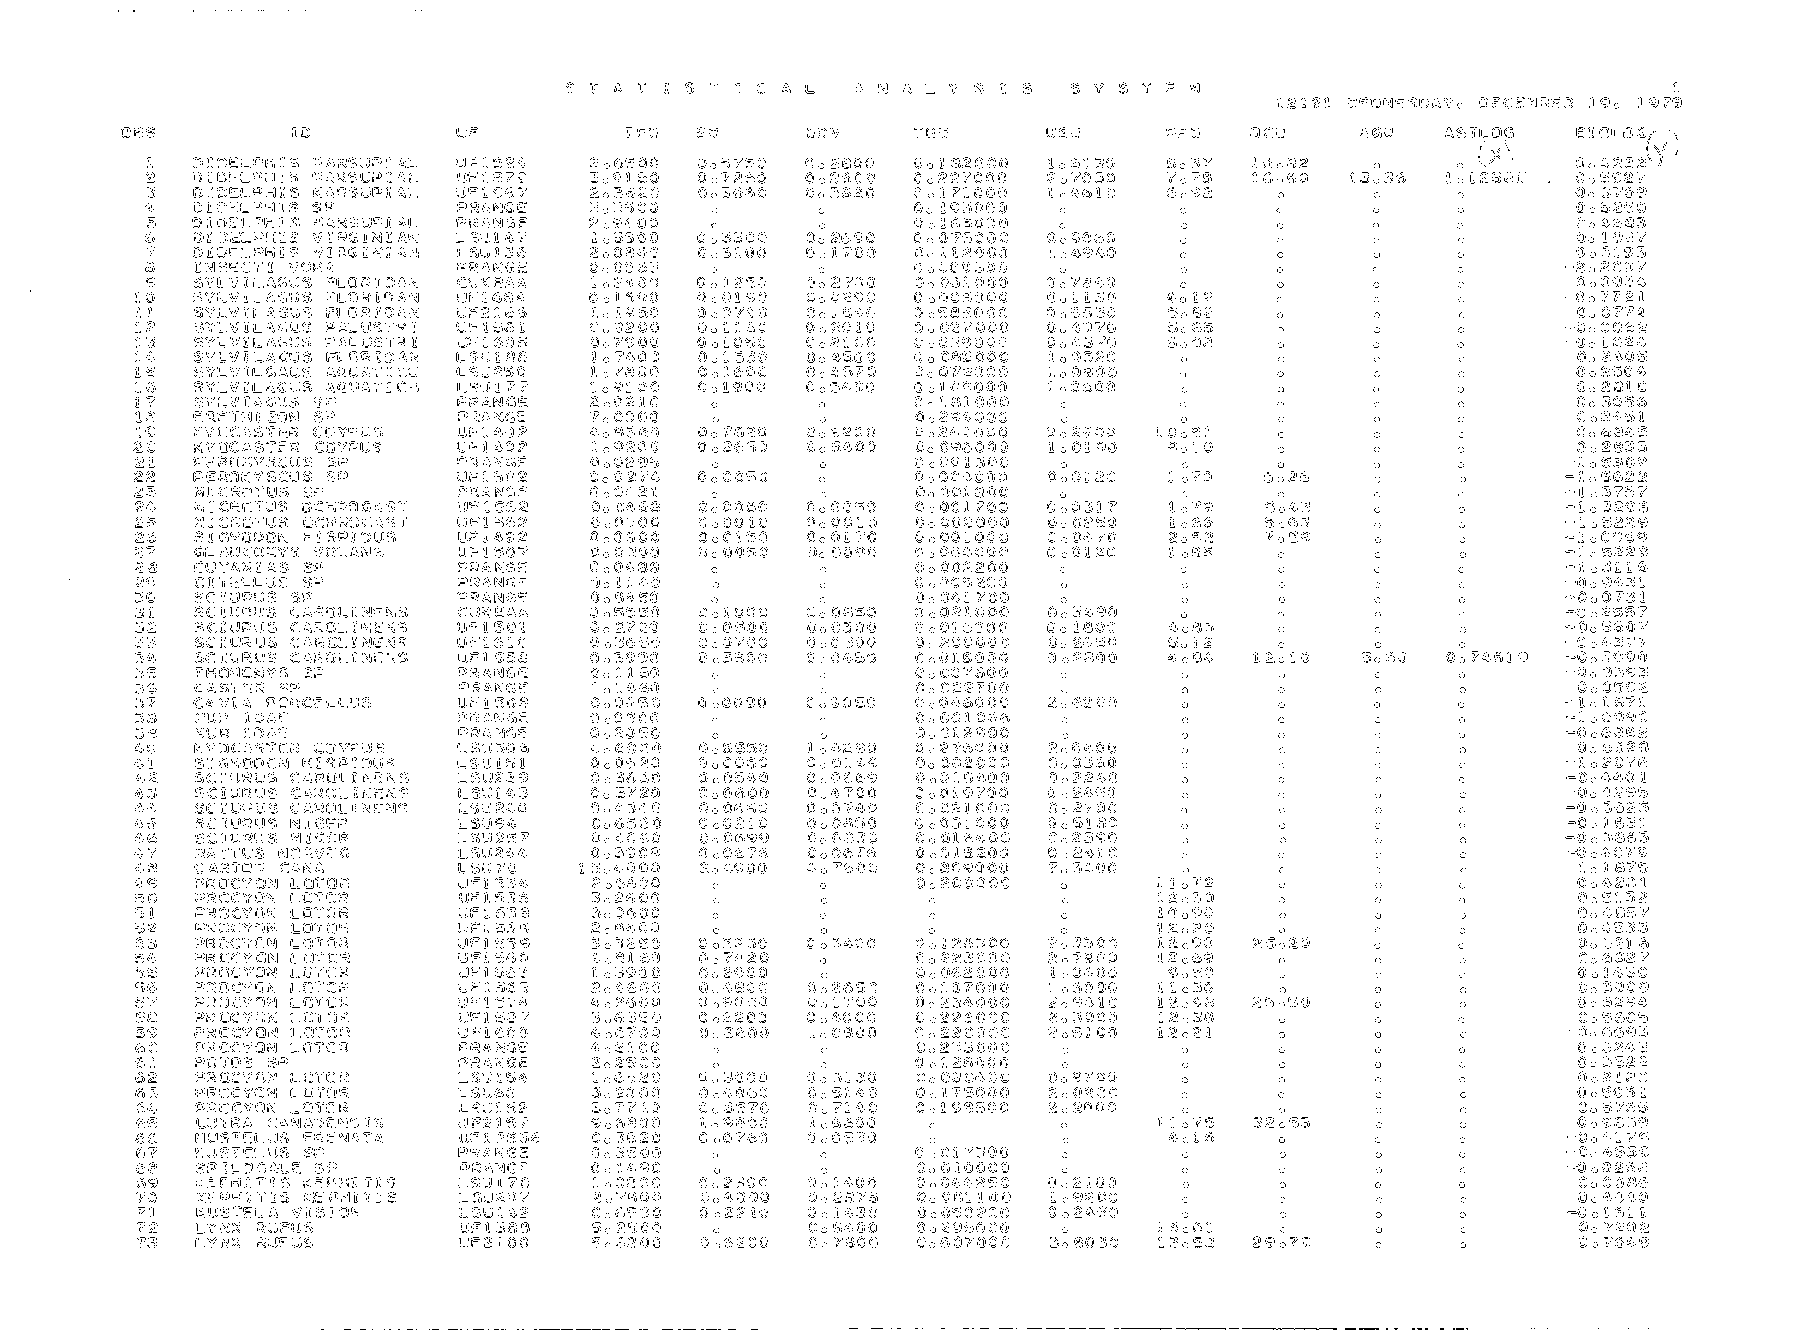

In [7]:
canny = cv2.Canny(binary, 60, 300)  
canny = cv2.bitwise_not(canny)
show_image(canny)

In [8]:
ocr = pytesseract.image_to_string(canny, lang='eng', config='allometry.config')
print(ocr)

SY ATE STFT CAL AN AL VY SUS SV SYEM

L22 VENNESNAV. OECENBER 195 1979

 

 

 

 

 

 

QBS O UF TF SY O TAYW US PF Y C AGU ASTLOG BLOLOG
QOLDELESHIS MARSUEPT AL IFLS24 2065 06 860575C E 2880 60182000 LG 390 B BV LOWK2 3 FP 2Y
2 OLOELPAHLS VARSUPTIAL UFIS7TS 30 A1 SO O0V250 O26 G27000 2Q30 C0V8 166089 13036 L2SA 0035927
3 OLDELPHAIS NARSYUP TAL YEFLIST 20353829 9503680 C 3826 COVLEGO L619O 6092 G0 3SV69
OLOSL PATS SP PRANGE 390 359 O G L93OGO O G0 5250
5S OIDELTAHLS MARSYUS AL PRANGE 2094809 O GBSOG O O 0504683
6 OY ODELOATS VERGINI AN LSU LS800 G2Z3C0 C 2690 G0 O7SECON 930SO60 O 3 O0 LOBY
V OLOELPHIS YIRGINI AN LSUISS 200860 G31OG CVGO AJLA2QO LSQ8O O O O03193
8 RENSECTL VORA PRANGE GG96 Q E.G00 306 Q O O -20 2007
9 SYLVYLAGUS FLOR LOAN CYUNBAA OG O9L25C 902700 O0 GGL G00 007849 3 C090934

10 SVLVYLILAGUS FLORIN AN UF ILS6B4 GS2O Q800196 G0 8290 C6 0 G9O8000 DL3 B 2 O O O0772
1 SYLVYILAGUS FLOR YDOAN UF2ZI66 L LOS9 V9D7T4SO BBG 6. S85C 00 209539 50 82 O GQ. BV7
12 SYLVYVILAGUS PALUS